# 1. Data Wrangling:

### 1.1. Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Load the Data:

In [2]:
barcelona = pd.read_csv('./data/Barcelona_reviews.csv')
london = pd.read_csv('./data/London_reviews.csv')
madrid = pd.read_csv('./data/Madrid_reviews.csv')
newdelhi = pd.read_csv('./data/New_Delhi_reviews.csv')
newyork = pd.read_csv('./data/New_York_reviews.csv')
paris = pd.read_csv('./data/Paris_reviews.csv')

C:\Users\mahmu\AppData\Local\Temp\ipykernel_14268\1134722884.py:1: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  barcelona = pd.read_csv('./data/Barcelona_reviews.csv')
C:\Users\mahmu\AppData\Local\Temp\ipykernel_14268\1134722884.py:2: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  london = pd.read_csv('./data/London_reviews.csv')
C:\Users\mahmu\AppData\Local\Temp\ipykernel_14268\1134722884.py:4: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  newdelhi = pd.read_csv('./data/New_Delhi_reviews.csv')
C:\Users\mahmu\AppData\Local\Temp\ipykernel_14268\1134722884.py:5: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  newyork = pd.read_csv('./data/New_York_reviews.csv')
C:\Users\mahmu\AppData\Local\Temp\ipykernel_14268\1134722884.py:6: DtypeWarning: Columns (0,1,

# 2. Data Preprocessing:

##### Define some Custom Functions for Data Wrangling:

In [3]:
def findmissing(x):
    missing = pd.concat([x.isnull().sum(), 100 * x.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing.sort_values(by='count',ascending=False)
    return(missing)

In [4]:
def findnull(x):
    y = x[x.isnull().any(axis=1)]
    return(y)

In [5]:
def dropnullrows(x):
    x = x.dropna(how='any',axis=0)

### 2.1. Exploring the Datasets:

In [6]:
findmissing(barcelona)

,count,%
Unnamed: 0,0,0.00000
parse_count,0,0.00000
restaurant_name,0,0.00000
rating_review,0,0.00000
sample,0,0.00000
review_id,0,0.00000
title_review,1,0.00024
review_preview,1,0.00024
review_full,2,0.00048
date,2,0.00048


In [7]:
findnull(barcelona)

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
187262,187662,187663,Arrosseria_Xativa_Les_Corts,4,Positive,review_209790779,Nice ambience and good quality,Three nights in to our stay it is a relief to ...,NaN,NaN,NaN,NaN,NaN
187263,wq,Three nights in to our stay it is a relief to ...,"June 10, 2014",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_116920,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
findmissing(london)

,count,%
Unnamed: 0,0,0.000000
parse_count,9,0.000903
restaurant_name,9,0.000903
rating_review,9,0.000903
sample,9,0.000903
review_id,9,0.000903
title_review,15,0.001505
review_preview,15,0.001505
review_full,21,0.002107
date,21,0.002107


In [9]:
findnull(london)

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
196133,196680,196681,The_Queens_Head,4.0,Positive,review_176616387,what a star,Dropped in for a quick drink before a show. wh...,NaN,NaN,NaN,NaN,NaN
196134,The owners are most welcoming. You won't regre...,Dropped in for a quick drink before a show. wh...,"September 10, 2013",London_England,https://www.tripadvisor.com/Restaurant_Review-...,UID_145402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412019,413290,413291,Hawksmoor_Knightsbridge,5.0,Positive,review_399987029,lovely diner,lovely diner in the heart of knightsbridge,NaN,NaN,NaN,NaN,NaN
412020,the atmosphere is really peacefull (was sunday...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412021,we enjoyed the sirloin and rump!!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412022,incredible dessert strawberry and white chocol...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412023,great staff very helpful and friendly,lovely diner in the heart of knightsbridgethe ...,"August 1, 2016",London_England,https://www.tripadvisor.com/Restaurant_Review-...,UID_52267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592749,594700,594701,Wahaca_Covent_Garden,5.0,Positive,review_183099322,margarita heaven,Title surely says it all BUT if not there are ...,NaN,NaN,NaN,NaN,NaN
592750,Pulled pork burritto (with cheese),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592751,Guacomole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
findmissing(madrid)

,count,%
Unnamed: 0,0,0.0
parse_count,0,0.0
restaurant_name,0,0.0
rating_review,0,0.0
sample,0,0.0
review_id,0,0.0
title_review,0,0.0
review_preview,0,0.0
review_full,0,0.0
date,0,0.0


In [11]:
findmissing(newdelhi)

,count,%
Unnamed: 0,0,0.000000
parse_count,0,0.000000
restaurant_name,0,0.000000
rating_review,0,0.000000
sample,0,0.000000
review_id,0,0.000000
title_review,2,0.001006
review_preview,2,0.001006
review_full,51174,25.745075
date,51174,25.745075


In [12]:
findnull(newdelhi)

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
79901,80469,80470,Hi_Mircheee,3,Negative,review_217165049,over priced,this is a over priced restro with no taste in ...,NaN,NaN,NaN,NaN,NaN
79902,80469,80470,Hi_Mircheee,3,Negative,review_217165049,over priced,this is a over priced restro with no taste in ...,NaN,NaN,NaN,NaN,NaN
79903,80469,80470,Hi_Mircheee,3,Negative,review_217165049,over priced,this is a over priced restro with no taste in ...,NaN,NaN,NaN,NaN,NaN
79904,80469,80470,Hi_Mircheee,3,Negative,review_217165049,over priced,this is a over priced restro with no taste in ...,NaN,NaN,NaN,NaN,NaN
79905,80469,80470,Hi_Mircheee,3,Negative,review_217165049,over priced,this is a over priced restro with no taste in ...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131070,80469,80470,Hi_Mircheee,3,Negative,review_217165049,over priced,this is a over priced restro with no taste in ...,NaN,NaN,NaN,NaN,NaN
131071,80469,80470,Hi_Mircheee,3,Negative,review_217165049,over priced,this is a over priced restro with no taste in ...,NaN,NaN,NaN,NaN,NaN
131072,most of the time u end up wating 30 40 min fo...,this is a over priced restro with no taste in ...,"July 23, 2014",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_7681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192355,142015,142016,The_Great_Kabab_Factory,5,Positive,review_201442126,awesome starters and desserts,well this review is a bit late as i dined here...,NaN,NaN,NaN,NaN,NaN


In [13]:
findmissing(newyork)

,count,%
Unnamed: 0,0,0.000000
parse_count,0,0.000000
restaurant_name,0,0.000000
rating_review,0,0.000000
sample,0,0.000000
review_id,0,0.000000
title_review,1,0.000196
review_preview,1,0.000196
review_full,2,0.000392
date,2,0.000392


In [14]:
findnull(newyork)

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
300450,304661,304662,Rosa_Mexicano,5,Positive,review_457424042,Special birthday dinner while visiting from En...,Went on recommendation from a friend. Service ...,NaN,NaN,NaN,NaN,NaN
300451,roasted poblano chile. And good value. Best me...,Went on recommendation from a friend. Service ...,"February 5, 2017",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_173516,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
findmissing(paris)

,count,%
Unnamed: 0,0,0.000000
parse_count,0,0.000000
restaurant_name,0,0.000000
rating_review,0,0.000000
sample,0,0.000000
review_id,0,0.000000
title_review,1,0.000197
review_preview,1,0.000197
review_full,2,0.000394
date,2,0.000394


In [16]:
findnull(paris)

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
377201,382266,382267,Cafe_George_V,3,Negative,review_279955176,Lovely location but ask the price before order...,5 of us walked miles from the Louvre along Ave...,NaN,NaN,NaN,NaN,NaN
377202,We were quickly showed...,5 of us walked miles from the Louvre along Ave...,"June 13, 2015",Paris_Ile_de_France,https://www.tripadvisor.com/Restaurant_Review-...,UID_148676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Change the 'City' Column with the corresponding city name for all dataframe:

In [17]:
barcelona['city'] = 'Barcelona'
london['city'] = 'London'
madrid['city'] = 'Madrid'
newdelhi['city'] = 'New_Delhi'
newyork['city'] = 'New_York'
paris['city'] = 'Paris'

### 2.3. Merge the Dataframes:

In [18]:
# all_dfs = [barcelona, london, madrid, newdelhi, newyork, paris]
df = pd.concat([barcelona, london, madrid, newdelhi, newyork, paris]).reset_index(drop=True)

In [19]:
#barcelona = barcelona.dropna(how='any',axis=0)
#london = london.dropna(how='any',axis=0)
#madrid = madrid.dropna(how='any',axis=0)
#newdelhi = newdelhi.dropna(how='any',axis=0)
#newyork = newyork.dropna(how='any',axis=0)
#paris = paris.dropna(how='any',axis=0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807208 entries, 0 to 2807207
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       object
 1   parse_count      object
 2   restaurant_name  object
 3   rating_review    object
 4   sample           object
 5   review_id        object
 6   title_review     object
 7   review_preview   object
 8   review_full      object
 9   date             object
 10  city             object
 11  url_restaurant   object
 12  author_id        object
dtypes: object(13)
memory usage: 278.4+ MB


### 2.4. Drop all Unnecessary Columns:

In [21]:
df.drop(columns=["Unnamed: 0","parse_count","review_id","url_restaurant","author_id","date","title_review","review_preview"],inplace=True)

In [22]:
df.head()

,restaurant_name,rating_review,sample,review_full,city
0,Chalito_Rambla,1,Negative,"Ok, this place is terrible! Came here bc we’ve...",Barcelona
1,Chalito_Rambla,5,Positive,This place was a great surprise. The food is d...,Barcelona
2,Chalito_Rambla,5,Positive,The food is excellent.....the ambiance is very...,Barcelona
3,Chalito_Rambla,5,Positive,"The food is execellent ,affortable price for p...",Barcelona
4,Chalito_Rambla,5,Positive,"Mr Suarez,The food at your restaurant was abso...",Barcelona


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807208 entries, 0 to 2807207
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   restaurant_name  object
 1   rating_review    object
 2   sample           object
 3   review_full      object
 4   city             object
dtypes: object(5)
memory usage: 107.1+ MB


In [24]:
findmissing(df)

,count,%
restaurant_name,9,0.000321
rating_review,9,0.000321
sample,9,0.000321
review_full,51201,1.823912
city,0,0.000000


In [25]:
findnull(df)

,restaurant_name,rating_review,sample,review_full,city
187262,Arrosseria_Xativa_Les_Corts,4,Positive,NaN,Barcelona
187263,"June 10, 2014",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,NaN,Barcelona
612489,The_Queens_Head,4.0,Positive,NaN,London
612490,"September 10, 2013",London_England,https://www.tripadvisor.com/Restaurant_Review-...,NaN,London
828375,Hawksmoor_Knightsbridge,5.0,Positive,NaN,London
...,...,...,...,...,...
1782127,"April 16, 2014",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,NaN,New_Delhi
2088993,Rosa_Mexicano,5,Positive,NaN,New_York
2088994,"February 5, 2017",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,NaN,New_York
2676207,Cafe_George_V,3,Negative,NaN,Paris


### 2.5. Delete the NaNs from the Dataframe:

In [26]:
df.isna().sum()

restaurant_name        9
rating_review          9
sample                 9
review_full        51201
city                   0
dtype: int64

In [27]:
df = df.dropna(how='any',axis=0)

In [28]:
df.isna().sum()

restaurant_name    0
rating_review      0
sample             0
review_full        0
city               0
dtype: int64

### 2.6. Define the Column Datatype:

In [29]:
df['rating_review'] = df['rating_review'].astype('float')
df['rating_review'] = df['rating_review'].astype('int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756007 entries, 0 to 2807207
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   restaurant_name  object
 1   rating_review    int64 
 2   sample           object
 3   review_full      object
 4   city             object
dtypes: int64(1), object(4)
memory usage: 126.2+ MB


In [31]:
del [[ barcelona, london, madrid, newdelhi, newyork, paris]]  # these are unnecessary for further analysis

# 3. Data Exploration:

### 3.1. Exploring the Dataframe:

In [32]:
df.groupby('city').count()

,restaurant_name,rating_review,sample,review_full
city,,,,
Barcelona,416354,416354,416354,416354
London,996546,996546,996546,996546
Madrid,176848,176848,176848,176848
New_Delhi,147598,147598,147598,147598
New_York,510461,510461,510461,510461
Paris,508200,508200,508200,508200


The 'London' dataset is the largest dataset, following by New York and Paris. The smallest dataset is from the New Delhi city.

### 3.2. Exploring the variables:

##### "Sample" and "Rating_Reiew" Column:

The 'Sample' and the 'Rating Review' Columns are the response variables considering the reviews given by the diners. We would like to get an overview on these two columns.

Text(0, 0.5, 'Total Count on Reviews')

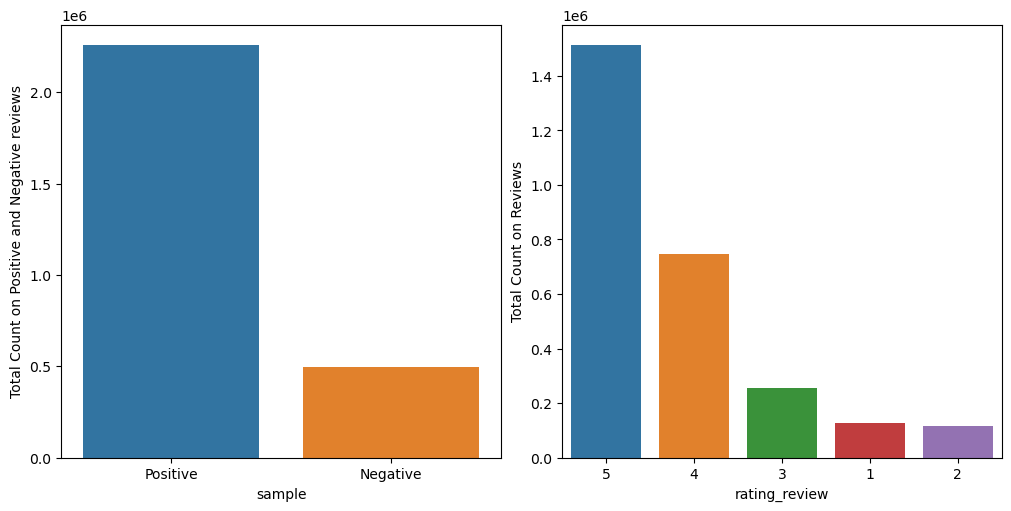

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5),layout="constrained")

#Create a Barplot:
sns.countplot( x= 'sample', data= df, order=df['sample'].value_counts().index, ax=ax1)
ax1.set_ylabel("Total Count on Positive and Negative reviews")

sns.countplot( x= 'rating_review', data= df, order=df['rating_review'].value_counts().index, ax=ax2)
ax2.set_ylabel("Total Count on Reviews")


From the graphical illustration, we see that in general positive and 5 star reviews are mostly given in these 5 datasets by the reviewers.

Now, let's observe the response of the reviews by different cities:

<AxesSubplot:xlabel='rating_review', ylabel='count'>

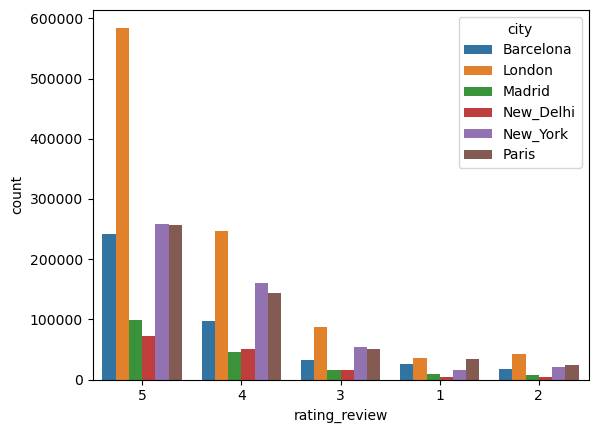

In [34]:
sns.countplot(data=df, hue= 'city', x='rating_review', order=df['rating_review'].value_counts().index,)

<AxesSubplot:xlabel='sample', ylabel='count'>

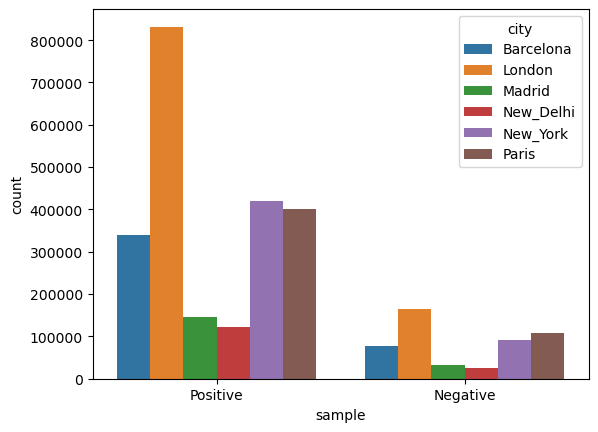

In [35]:
sns.countplot(data=df, hue= 'city', x='sample', order=df['sample'].value_counts().index,)

From the graphical illustration above, we can interprete that majority the responses are positive or 5star rated, so balancing out the response for this multi-class classification problem should be considered with importance.

##### "Restaurant_Name" Column:

In [36]:
df.groupby('city')['restaurant_name'].nunique()

city
Barcelona     6621
London        1827
Madrid        5855
New_Delhi     5530
New_York      1805
Paris        11471
Name: restaurant_name, dtype: int64

In [37]:
barcelona= df.loc[df["city"] == 'Barcelona', "review_full"]
barcelona.head()

0    Ok, this place is terrible! Came here bc we’ve...
1    This place was a great surprise. The food is d...
2    The food is excellent.....the ambiance is very...
3    The food is execellent ,affortable price for p...
4    Mr Suarez,The food at your restaurant was abso...
Name: review_full, dtype: object

In [38]:
barcelona.info()

<class 'pandas.core.series.Series'>
Int64Index: 416354 entries, 0 to 416355
Series name: review_full
Non-Null Count   Dtype 
--------------   ----- 
416354 non-null  object
dtypes: object(1)
memory usage: 6.4+ MB


In [39]:
london= df.loc[df["city"] == 'London', "review_full"]
london.head()

416356    I was away for couple of months and I am so ha...
416357    I recently ordered over the phone from Cocotte...
416358    Came here because we missed our table at Farma...
416359    My first time in cocotte and was amazed by how...
416360    A healthy-homemade dishes using farm-grown ing...
Name: review_full, dtype: object

In [40]:
london.info()

<class 'pandas.core.series.Series'>
Int64Index: 996546 entries, 416356 to 1412922
Series name: review_full
Non-Null Count   Dtype 
--------------   ----- 
996546 non-null  object
dtypes: object(1)
memory usage: 15.2+ MB


In [41]:
madrid= df.loc[df["city"] == 'Madrid', "review_full"]
madrid.head()

1412923    The menu of Yakuza is a bit of a lottery, some...
1412924    Check your bill when you cancel just in case y...
1412925    I had the yuca profiteroles and the veggie bur...
1412926    A friend recommended this place as one of the ...
1412927    Amazing terrace in madrid - great atmosphere a...
Name: review_full, dtype: object

In [42]:
madrid.info()

<class 'pandas.core.series.Series'>
Int64Index: 176848 entries, 1412923 to 1589770
Series name: review_full
Non-Null Count   Dtype 
--------------   ----- 
176848 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB


In [43]:
newdelhi= df.loc[df["city"] == 'New_Delhi', "review_full"]
newdelhi.head()

1589771    Visited Tres last week with my dad for lunch. ...
1589772    The restaurant design is classy, the service i...
1589773    I went to Tres while visiting my family in Del...
1589774    We went for lunch, for a Friday afternoon, it ...
1589775    Tres is my most often visited and favourite st...
Name: review_full, dtype: object

In [44]:
newdelhi.info()

<class 'pandas.core.series.Series'>
Int64Index: 147598 entries, 1589771 to 1788542
Series name: review_full
Non-Null Count   Dtype 
--------------   ----- 
147598 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [45]:
newyork= df.loc[df["city"] == 'New_York', "review_full"]
newyork.head()

1788543    My wife and I have been eating dinner frequent...
1788544    Came with family for Labor Day weekend brunch ...
1788545    Food was mediocre at best. The lamb chops are ...
1788546    My co-workers were volunteering at a foodbank ...
1788547    Lido is an intimate boutique style restaurant....
Name: review_full, dtype: object

In [46]:
newyork.info()

<class 'pandas.core.series.Series'>
Int64Index: 510461 entries, 1788543 to 2299005
Series name: review_full
Non-Null Count   Dtype 
--------------   ----- 
510461 non-null  object
dtypes: object(1)
memory usage: 7.8+ MB


In [47]:
paris= df.loc[df["city"] == 'Paris', "review_full"]
paris.head()

2299006    The waiter was very enthusiastic and caring.Th...
2299007    Lovely friendly bistro, great food. Menu not e...
2299008    Great dishes based on meat, fine drinks. Reall...
2299009    The food is delicious, the decoration is amazi...
2299010    This is a great place to hangout with friends ...
Name: review_full, dtype: object

In [48]:
paris.info()

<class 'pandas.core.series.Series'>
Int64Index: 508200 entries, 2299006 to 2807207
Series name: review_full
Non-Null Count   Dtype 
--------------   ----- 
508200 non-null  object
dtypes: object(1)
memory usage: 7.8+ MB


##### "review_full" Column:

The 'review_full' column is the column that contains the column texts with the reviews from diners. This column is the focus of our interest in this Analysis. We would continue to our Sentiment Analysis on these reviews

In [49]:
df['Word_count']= df['review_full'].map(lambda x: len(x.split()))

<AxesSubplot:xlabel='rating_review', ylabel='Word_count'>

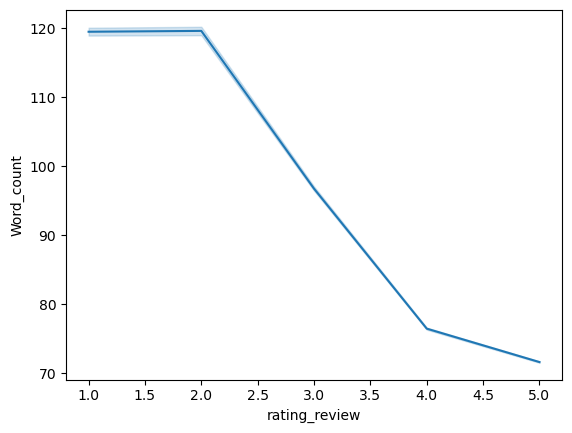

In [50]:
sns.lineplot(x='rating_review', data=df, y='Word_count')

In [51]:
#reference: https://www.geeksforgeeks.org/python-nlp-analysis-of-restaurant-reviews/

#### Import the libraries:

# library to clean data
import re 
# Natural Language Tool Kit
import nltk 
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords, wordnet
# for Stemming propose 
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahmu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
sw = stopwords.words('english')

In [53]:
# Reference: https://github.com/rylewww/Tripadvisor-NLP/blob/master/Final_Notebook.ipynb

def getwordnetwithpos(x):
    '''
    Translate nltk POS to wordnet tags
    '''
    if x.startswith('J'):
        return wordnet.ADJ
    elif x.startswith('V'):
        return wordnet.VERB
    elif x.startswith('N'):
        return wordnet.NOUN
    elif x.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [54]:
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

def docprep(doc, stop_words=sw):
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    doc = pos_tag(doc)
    doc = [(word[0], getwordnetwithpos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [55]:
tokenbarcelona = docprep(barcelona)

TypeError: expected string or bytes-like object

In [ ]:
#df['tokenized'] = df['review_full'].apply(docprep)

Try with spaCy:

In [56]:
# Import the spaCy library for lemmatization:

import spacy
nlp = spacy.load('en_core_web_sm')
nlp


In [57]:
def preprocess(text):
    lower= text.lower()
    doc= nlp(lower)
    tokens= [token.lemma_ for token in doc ]
    a_lemma= [lemma for lemma in tokens if lemma not in spacy.lang.en.stop_words.STOP_WORDS and lemma.isalpha()]
    return " ".join(a_lemma)

In [58]:
textdocbarcelona = barcelona.apply(lambda x: preprocess(x))

: 

In [ ]:
#df['p_review'] = df['review_full'].apply(preprocess)

In [ ]:
barcelona_doc = nlp(barcelona)

In [ ]:
textdocbarcelona = barcelona.apply(lambda x: nlp.tokenizer(x))

In [ ]:
textdocbarcelona.head()

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'the bats saw the cats with best stripes hanging upside down by their feet')

# Create list of tokens from given string
tokens = []
for token in doc:
	tokens.append(token)

print(tokens)
#> [the, bats, saw, the, cats, with, best, stripes, hanging, upside, down, by, their, feet]

lemmatized_sentence = " ".join([token.lemma_ for token in doc])

print(lemmatized_sentence)
#> the bat see the cat with good stripe hang upside down by -PRON- foot


In [ ]:
# Find the Stopwords in the reviews:
from nltk.corpus import stopwords, wordnet
sw = stopwords.words('english')



In [ ]:
# Write a function to form the corpus for corresponding dataframe:

def findcorpusforcity(x):
	# Initialize empty array to append clean text 
	corpus = [] 
	# All (reviews) rows to clean
	for i in range(0,len(df.loc[df["city"] == x, "review_full"])):
		review = re.sub('[^a-zA-Z]', ' ', df['review_full'][i]) 

		# convert all cases to lower cases
		review = review.lower() 
	
		# split to array(default delimiter is " ")
		review = review.split() 
	
		# creating PorterStemmer object to take main stem of each word
		ps = PorterStemmer() 
	
		# loop for stemming each word in string array at ith row 
		review = [ps.stem(word) for word in review
				if not word in set(stopwords.words('english'))] 
				
		# rejoin all string array elements to create back into a string
		review = ' '.join(review) 
	
		# append each string to create array of clean text 
		corpus.append(review) 


In [ ]:
#review = re.sub('[^a-zA-Z]', ' ', df['review_full'][i]) 

In [ ]:
barcelona= df.loc[df["city"] == 'Barcelona', "review_full"]
barcelona.head()

In [ ]:
len(df.loc[df["city"] == 'Barcelona', "review_full"])

In [ ]:
print(review)

In [ ]:
print(corpus)

In [ ]:
len(df['review_full'])

# 3.  Data Training:

In [ ]:
import spacy